## vehicle price prediction using multiple linear regression

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [68]:
cars = pd.read_csv("Car.csv")
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [69]:
# symboling: -2 (least risky) to +3 most risky
# Most cars are 0,1,2
cars['symboling'].astype('category').value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [70]:
cars['CarName']=cars['CarName'].apply(lambda name: name.split()[0])
cars.rename(index=str,columns={'CarName':'Company'},inplace=True)
cars['total_mpg']=(55*cars['citympg']/100)+(45*cars['highwaympg']/100)
cars.drop(['car_ID','citympg','highwaympg'],axis=1,inplace=True)
cars.symboling=cars.symboling.astype(str)
cars

,symboling,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,price,total_mpg
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,13495.0,23.70
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,16500.0,23.70
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,six,152,mpfi,2.68,3.47,9.0,154,5000,16500.0,22.15
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,four,109,mpfi,3.19,3.40,10.0,102,5500,13950.0,26.70
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,five,136,mpfi,3.19,3.40,8.0,115,5500,17450.0,19.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,four,141,mpfi,3.78,3.15,9.5,114,5400,16845.0,25.25
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,four,141,mpfi,3.78,3.15,8.7,160,5300,19045.0,21.70
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,six,173,mpfi,3.58,2.87,8.8,134,5500,21485.0,20.25
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,six,145,idi,3.01,3.40,23.0,106,4800,22470.0,26.45


In [71]:
cars.Company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [72]:
cars.Company.replace('maxda','mazda',inplace=True)
cars.Company.replace('Nissan','nissan',inplace=True)
cars.Company.replace('porcshce','porsche',inplace=True)
cars.Company.replace('toyouta','toyota',inplace=True)
cars.Company.replace('vokswagen','volkswagen',inplace=True)
cars.Company.replace('vw','volkswagen',inplace=True)

In [73]:
cars.Company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

(array([83., 45., 35., 18.,  6.,  3.,  5.,  7.,  2.,  1.]),
 array([ 5118. ,  9146.2, 13174.4, 17202.6, 21230.8, 25259. , 29287.2,
        33315.4, 37343.6, 41371.8, 45400. ]),
 <a list of 1 Patch objects>)

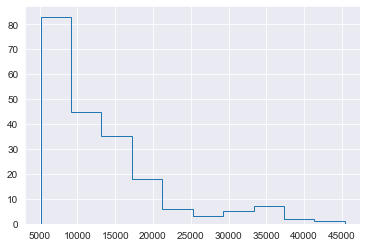

In [17]:
sns.set_style('darkgrid')
plt.hist(cars['price'],histtype='step')

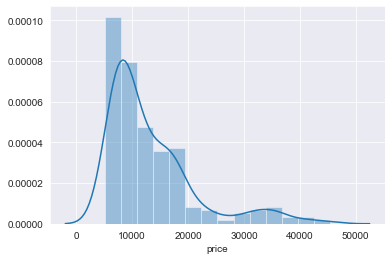

In [18]:
sns.distplot(cars.price)

In [19]:
print('Mean:',cars.price.mean())
print('Median:',cars.price.median())
print('Standard Deviation:',cars.price.std())
print('Variance:',cars.price.var())

Mean: 13276.710570731706
Median: 10295.0
Standard Deviation: 7988.85233174315
Variance: 63821761.57839796


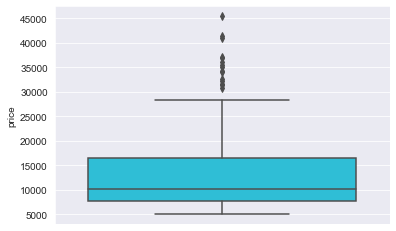

In [21]:
sns.boxplot(y=cars.price,color='#13d2f2')

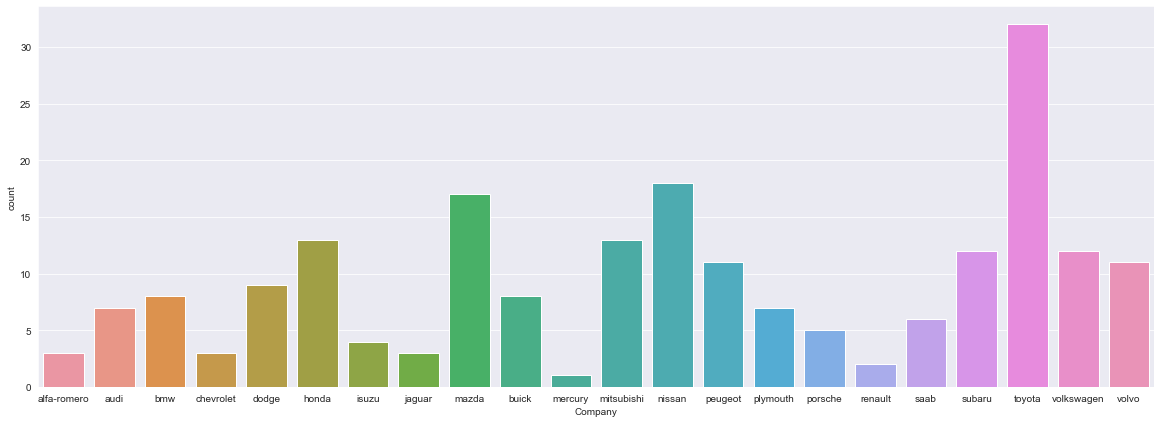

In [22]:
plt.figure(figsize=[20,7])
sns.countplot(cars.Company)

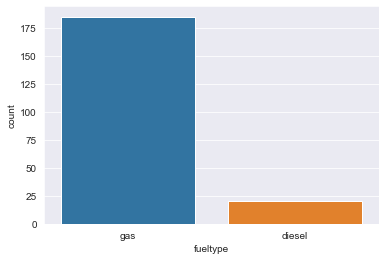

In [23]:
sns.countplot(cars.fueltype)

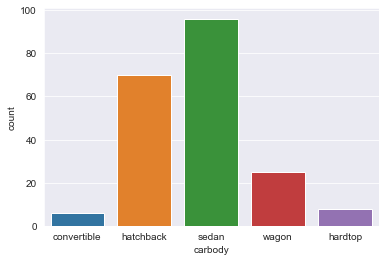

In [24]:
sns.countplot(cars.carbody)

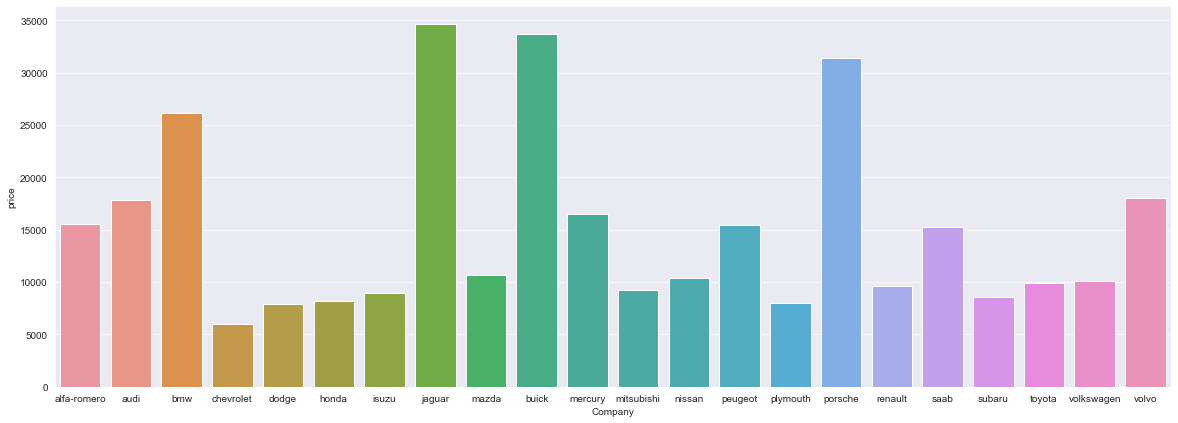

In [25]:
plt.figure(figsize=[20,7])
sns.barplot(x=cars.Company,y=cars.price,ci=None)

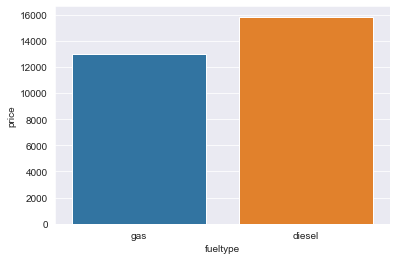

In [26]:
sns.barplot(x=cars.fueltype,y=cars.price,ci=None)

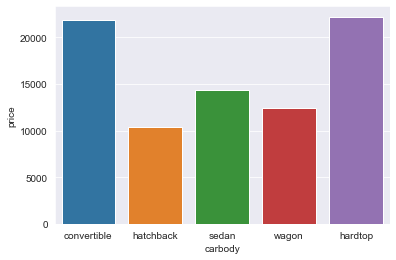

In [27]:
sns.barplot(x=cars.carbody,y=cars.price,ci=None)

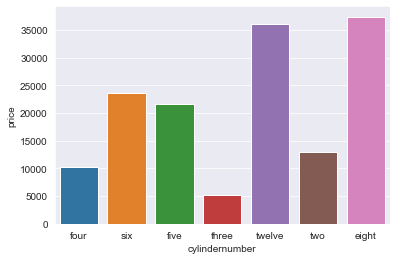

In [28]:
sns.barplot(x=cars.cylindernumber,y=cars.price,ci=None)

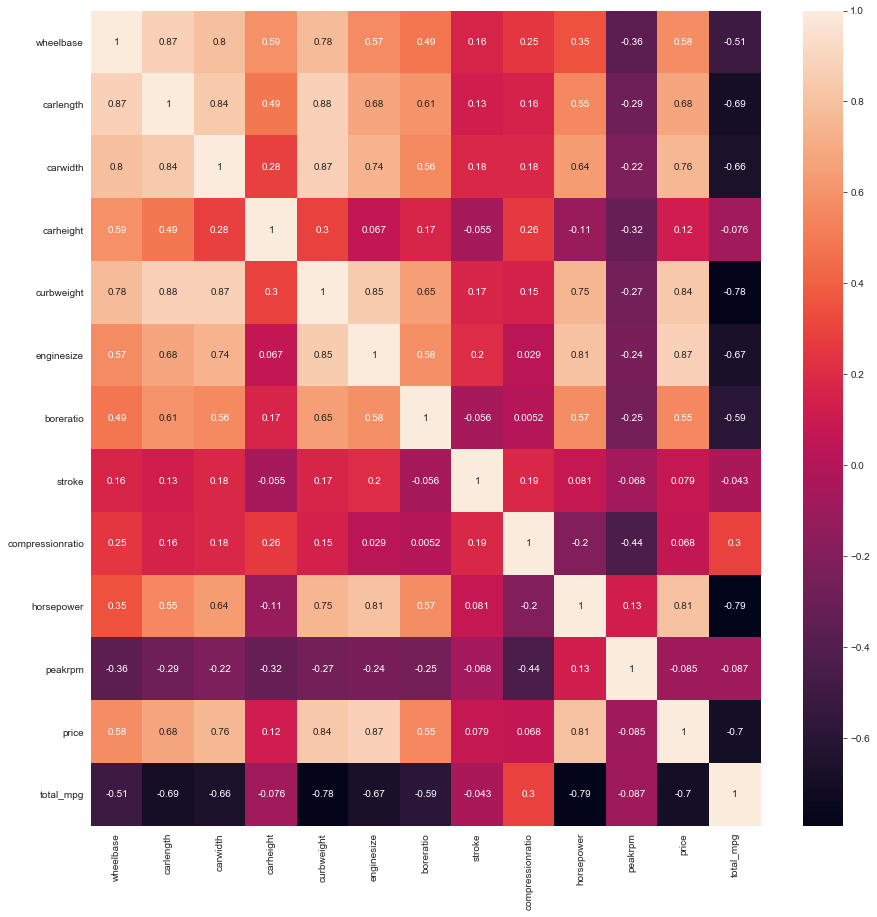

In [74]:
plt.figure(figsize=[15,15])
sns.heatmap(cars.corr(),annot=True)

In [83]:
corr_pairs =cars.corr().unstack()
corr_pairs

wheelbase  wheelbase           1.000000
           carlength           0.874587
           carwidth            0.795144
           carheight           0.589435
           curbweight          0.776386
                                 ...   
total_mpg  compressionratio    0.299310
           horsepower         -0.792822
           peakrpm            -0.086739
           price              -0.696213
           total_mpg           1.000000
Length: 169, dtype: float64

In [30]:
cars.drop(['wheelbase','carheight','boreratio','stroke', 'compressionratio','peakrpm'],axis=1,inplace=True)
cars.head()

,symboling,Company,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,horsepower,price,total_mpg
0,3,alfa-romero,gas,std,two,convertible,rwd,front,168.8,64.1,2548,dohc,four,130,mpfi,111,13495.0,23.70
1,3,alfa-romero,gas,std,two,convertible,rwd,front,168.8,64.1,2548,dohc,four,130,mpfi,111,16500.0,23.70
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,171.2,65.5,2823,ohcv,six,152,mpfi,154,16500.0,22.15
3,2,audi,gas,std,four,sedan,fwd,front,176.6,66.2,2337,ohc,four,109,mpfi,102,13950.0,26.70
4,2,audi,gas,std,four,sedan,4wd,front,176.6,66.4,2824,ohc,five,136,mpfi,115,17450.0,19.80


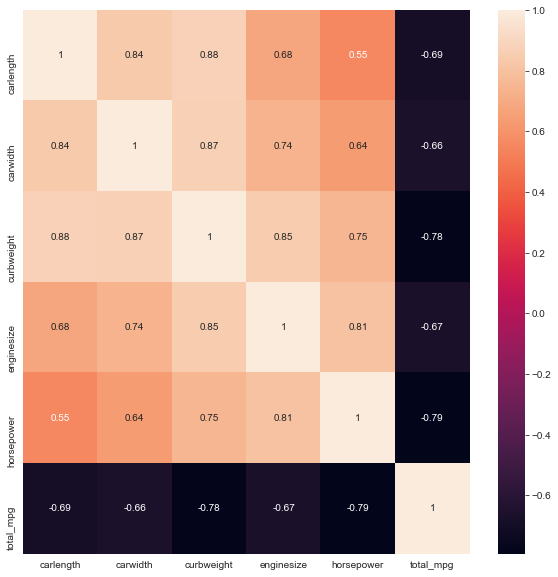

In [31]:
plt.figure(figsize=[10,10])
sns.heatmap(cars.drop('price',axis=1).corr(),annot=True)

In [32]:
cars=pd.get_dummies(cars)

In [33]:
predictors=cars['horsepower']
target=cars['price']

In [34]:
import statsmodels.api as sm
predictors= sm.add_constant(predictors)
lm_1 = sm.OLS(target,predictors).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Mon, 24 May 2021   Prob (F-statistic):           1.48e-48
Time:                        20:54:33   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3721.7615    929.849     -4.003      0.0

In [35]:
predictors=cars['enginesize']
import statsmodels.api as sm
predictors= sm.add_constant(predictors)
lm_1 = sm.OLS(target,predictors).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     657.6
Date:                Mon, 24 May 2021   Prob (F-statistic):           1.35e-65
Time:                        20:54:56   Log-Likelihood:                -1984.4
No. Observations:                 205   AIC:                             3973.
Df Residuals:                     203   BIC:                             3979.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8005.4455    873.221     -9.168      0.0

In [36]:
predictors=cars['curbweight']
import statsmodels.api as sm
predictors= sm.add_constant(predictors)
lm_1 = sm.OLS(target,predictors).fit()
print(lm_1.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     468.6
Date:                Mon, 24 May 2021   Prob (F-statistic):           1.21e-54
Time:                        20:55:12   Log-Likelihood:                -2009.8
No. Observations:                 205   AIC:                             4024.
Df Residuals:                     203   BIC:                             4030.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.948e+04   1543.962    -12.614      0.0

In [37]:
predictors=cars['total_mpg']
import statsmodels.api as sm
predictors= sm.add_constant(predictors)
lm_1 = sm.OLS(target,predictors).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     191.0
Date:                Mon, 24 May 2021   Prob (F-statistic):           4.74e-31
Time:                        20:55:23   Log-Likelihood:                -2064.5
No. Observations:                 205   AIC:                             4133.
Df Residuals:                     203   BIC:                             4140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.645e+04   1724.687     21.137      0.0

In [38]:
cars.drop(['horsepower','curbweight','total_mpg'],axis=1,inplace=True)
cars.shape

(205, 70)

In [39]:
cols_to_drop=cars.corr()[(cars.corr()['price']<=0.5) & (cars.corr()['price']>=-0.5)]
cols_to_drop=cols_to_drop.reset_index()['index']
cols_to_drop=list(cols_to_drop)
cars.drop(cols_to_drop,axis=1,inplace=True)

In [40]:
cars.shape
(205, 10)
cars.head()

,carlength,carwidth,enginesize,price,Company_buick,drivewheel_fwd,drivewheel_rwd,cylindernumber_four,fuelsystem_2bbl,fuelsystem_mpfi
0,168.8,64.1,130,13495.0,0,0,1,1,0,1
1,168.8,64.1,130,16500.0,0,0,1,1,0,1
2,171.2,65.5,152,16500.0,0,0,1,0,0,1
3,176.6,66.2,109,13950.0,0,1,0,1,0,1
4,176.6,66.4,136,17450.0,0,0,0,0,0,1


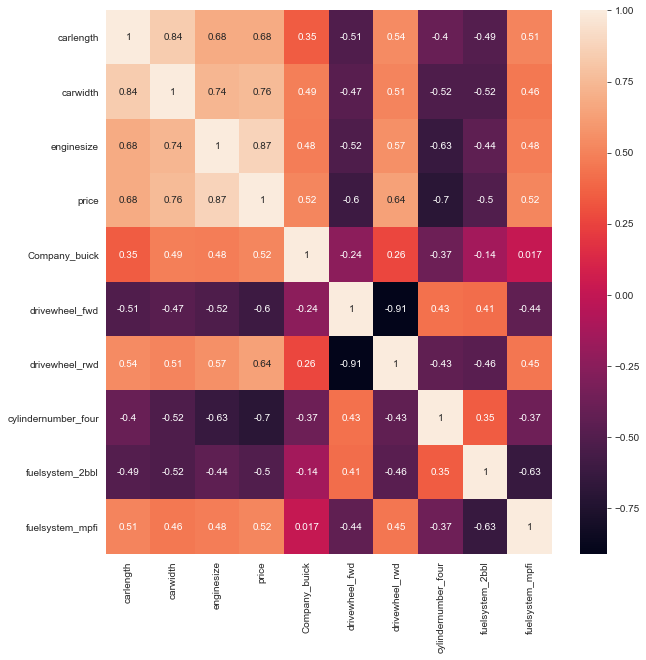

In [41]:
plt.figure(figsize=[10,10])
sns.heatmap(cars.corr(),annot=True)

In [42]:
cars.drop(['carlength','carwidth','Company_buick','fuelsystem_2bbl', 'fuelsystem_mpfi'],axis=1,inplace=True)

In [43]:
predictors=cars.drop('price',axis=1)
target=cars.price
predictors1=predictors['enginesize']
import statsmodels.api as sm
predictors1= sm.add_constant(predictors1)
lm_1 = sm.OLS(target,predictors1).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     657.6
Date:                Mon, 24 May 2021   Prob (F-statistic):           1.35e-65
Time:                        20:57:09   Log-Likelihood:                -1984.4
No. Observations:                 205   AIC:                             3973.
Df Residuals:                     203   BIC:                             3979.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8005.4455    873.221     -9.168      0.0

In [44]:
predictors2=predictors[['enginesize','drivewheel_fwd']]
import statsmodels.api as sm
predictors2= sm.add_constant(predictors2)
lm_2 = sm.OLS(target,predictors2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     390.3
Date:                Mon, 24 May 2021   Prob (F-statistic):           4.11e-70
Time:                        20:57:29   Log-Likelihood:                -1970.3
No. Observations:                 205   AIC:                             3947.
Df Residuals:                     202   BIC:                             3957.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3510.5293   1160.633     -3.

In [45]:
predictors3=predictors[['enginesize','drivewheel_rwd']]
import statsmodels.api as sm
predictors3= sm.add_constant(predictors3)
lm_3 = sm.OLS(target,predictors3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     391.4
Date:                Mon, 24 May 2021   Prob (F-statistic):           3.26e-70
Time:                        20:57:39   Log-Likelihood:                -1970.1
No. Observations:                 205   AIC:                             3946.
Df Residuals:                     202   BIC:                             3956.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -6378.7190    868.209     -7.

In [46]:
predictors4=predictors[['enginesize','drivewheel_fwd','drivewheel_rwd']]
import statsmodels.api as sm
predictors4= sm.add_constant(predictors4)
lm_4 = sm.OLS(target,predictors4).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     262.5
Date:                Mon, 24 May 2021   Prob (F-statistic):           3.07e-69
Time:                        20:57:46   Log-Likelihood:                -1969.2
No. Observations:                 205   AIC:                             3946.
Df Residuals:                     201   BIC:                             3960.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4829.7218   1458.548     -3.

In [47]:
predictors5=predictors[['enginesize','drivewheel_rwd','cylindernumber_four']]
import statsmodels.api as sm
predictors5= sm.add_constant(predictors5)
lm_5 = sm.OLS(target,predictors5).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     311.8
Date:                Mon, 24 May 2021   Prob (F-statistic):           2.55e-75
Time:                        20:57:55   Log-Likelihood:                -1954.9
No. Observations:                 205   AIC:                             3918.
Df Residuals:                     201   BIC:                             3931.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  21.9214   1

In [49]:
predictors6=predictors[['enginesize','drivewheel_fwd','cylindernumber_four']]
import statsmodels.api as sm
predictors6= sm.add_constant(predictors6)
lm_6 = sm.OLS(target,predictors6).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     308.0
Date:                Mon, 24 May 2021   Prob (F-statistic):           6.99e-75
Time:                        20:58:48   Log-Likelihood:                -1955.9
No. Observations:                 205   AIC:                             3920.
Df Residuals:                     201   BIC:                             3933.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2314.0832   1

Text(0, 0.5, 'Car Price')

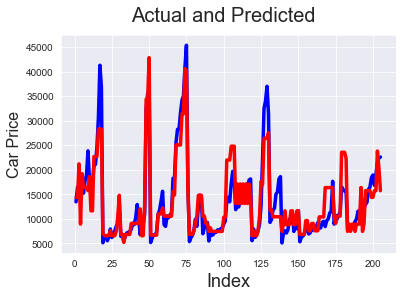

In [84]:
pred=lm_6.predict(predictors6)
# Actual vs Predicted
c = [i for i in range(1,206,1)]
fig = plt.figure()
plt.plot(c,target, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,pred, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)

Mean_Squared_Error : 11347528.099728283
r_square_value : 0.8213281339239666


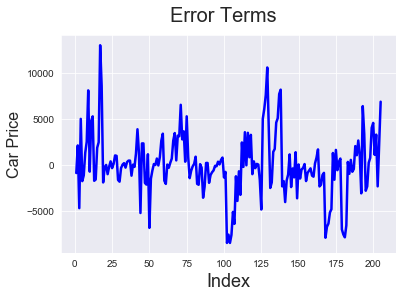

In [51]:
# Error terms
c = [i for i in range(1,206,1)]
fig = plt.figure()
plt.plot(c,target-pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Car Price', fontsize=16)    
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(target, pred)
r_squared = r2_score(target, pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Text(0, 0.5, 'Car Price')

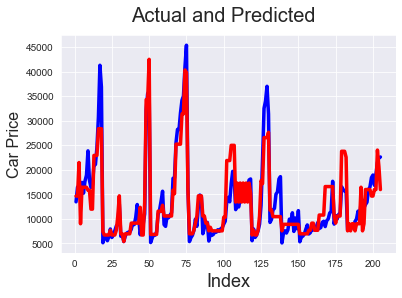

In [53]:
pred=lm_5.predict(predictors5)
# Actual vs Predicted
c = [i for i in range(1,206,1)]
fig = plt.figure()
plt.plot(c,target, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,pred, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)

Mean_Squared_Error : 11234025.847691912
r_square_value : 0.8231152772557074


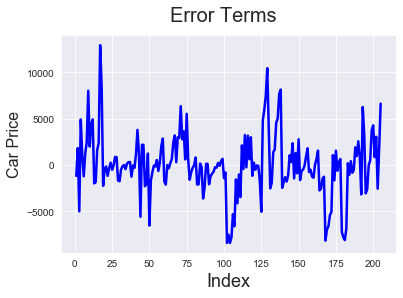

In [54]:
# Error terms
c = [i for i in range(1,206,1)]
fig = plt.figure()
plt.plot(c,target-pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Car Price', fontsize=16)   
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(target, pred)
r_squared = r2_score(target, pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Text(0, 0.5, 'Car Price')

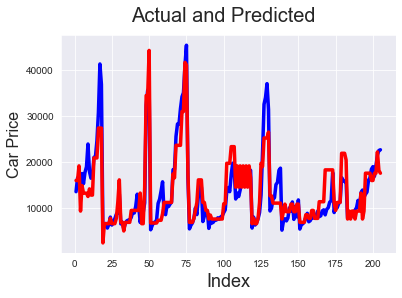

In [55]:
pred=lm_4.predict(predictors4)
# Actual vs Predicted
c = [i for i in range(1,206,1)]
fig = plt.figure()
plt.plot(c,target, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,pred, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)

Mean_Squared_Error : 12915408.499455474
r_square_value : 0.7966411611893495


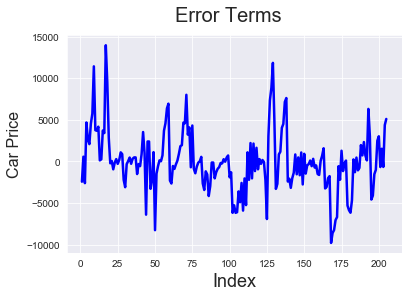

In [56]:
# Error terms
c = [i for i in range(1,206,1)]
fig = plt.figure()
plt.plot(c,target-pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Car Price', fontsize=16)  
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(target, pred)
r_squared = r2_score(target, pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Text(0, 0.5, 'Car Price')

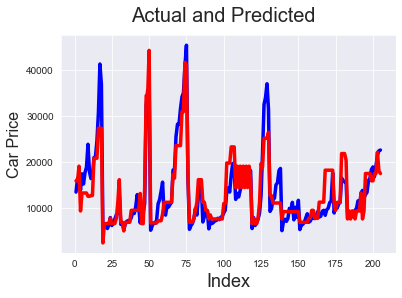

In [57]:
pred=lm_3.predict(predictors3)
# Actual vs Predicted
c = [i for i in range(1,206,1)]
fig = plt.figure()
plt.plot(c,target, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,pred, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)

Mean_Squared_Error : 13027426.534669885
r_square_value : 0.7948773875101807


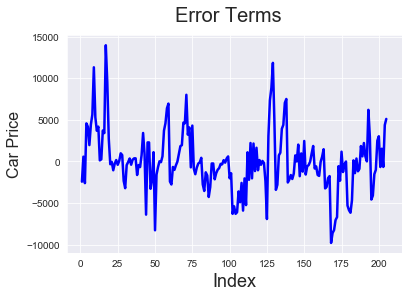

In [58]:
# Error terms
c = [i for i in range(1,206,1)]
fig = plt.figure()
plt.plot(c,target-pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Car Price', fontsize=16)    
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(target, pred)
r_squared = r2_score(target, pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Text(0, 0.5, 'Car Price')

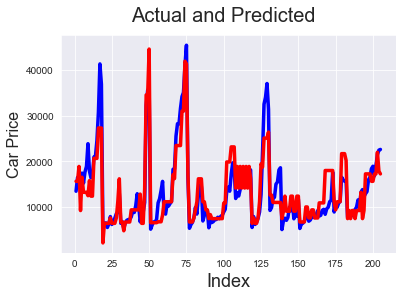

In [59]:
pred=lm_2.predict(predictors2)
# Actual vs Predicted
c = [i for i in range(1,206,1)]
fig = plt.figure()
plt.plot(c,target, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,pred, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)

Text(0, 0.5, 'Car Price')

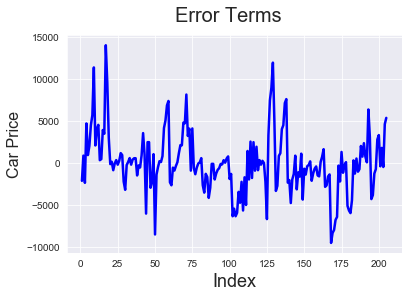

In [60]:
# Error terms
c = [i for i in range(1,206,1)]
fig = plt.figure()
plt.plot(c,target-pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Car Price', fontsize=16)    

In [61]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(target, pred)
r_squared = r2_score(target, pred)

print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 13057261.28493742
r_square_value : 0.7944076261262595


Text(0, 0.5, 'Car Price')

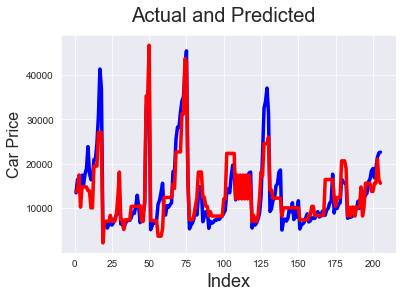

In [62]:
pred=lm_1.predict(predictors1)
# Actual vs Predicted
c = [i for i in range(1,206,1)]
fig = plt.figure()
plt.plot(c,target, color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,pred, color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Car Price', fontsize=16)

Mean_Squared_Error : 14980261.40555132
r_square_value : 0.7641291357806176


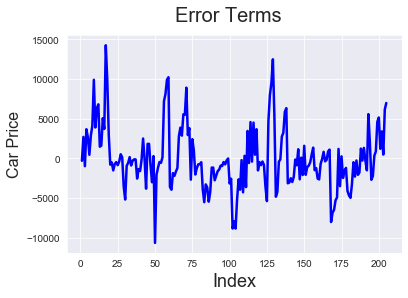

In [63]:
# Error terms
c = [i for i in range(1,206,1)]
fig = plt.figure()
plt.plot(c,target-pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Car Price', fontsize=16)    
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(target, pred)
r_squared = r2_score(target, pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

### We can see that models 6 and 5 predict the price pretty well. So the solution for our problem statement is to look at enginesize, forward/backward wheel drive and see if the number of cylinders is 4 (which has negative correlation with price) to determine the price